# _**Bibliotecas python**_

## Instalação de pacotes

In [1]:
%pip show statsmodels

Name: statsmodels
Version: 0.12.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: c:\users\murilo.ribeiro\appdata\local\continuum\anaconda3\lib\site-packages
Requires: patsy, pandas, scipy, numpy
Required-by: pmdarima
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Atualizando o pacote statsmodels para a versão 0.12.2 para a qual aplicamos o SEASONAL DECOMPOSE
%pip install statsmodels==0.12.2

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip show statsmodels

Name: statsmodels
Version: 0.12.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: c:\users\murilo.ribeiro\appdata\local\continuum\anaconda3\lib\site-packages
Requires: patsy, scipy, numpy, pandas
Required-by: pmdarima
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install pmdarima

  Using cached https://files.pythonhosted.org/packages/97/9f/da37cc4a188a1d5d203d65ab28d6504e17594b5342e0c1dc5610ee6f4535/numpy-1.21.6-cp37-cp37m-win_amd64.whl
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip show pmdarima

Name: pmdarima
Version: 1.8.5
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: None
Author-email: None
License: MIT
Location: c:\users\murilo.ribeiro\appdata\local\continuum\anaconda3\lib\site-packages
Requires: urllib3, scikit-learn, setuptools, Cython, numpy, statsmodels, scipy, pandas, joblib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install numpy==1.16.5 

  Using cached https://files.pythonhosted.org/packages/f4/f6/aa112f76ada64787f677278218738bb895e9642118b1e8db68c7edd66ec2/numpy-1.16.5-cp37-cp37m-win_amd64.whl
  Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


ERROR: tensorflow 2.8.2 has requirement numpy>=1.20, but you'll have numpy 1.16.5 which is incompatible.
ERROR: pmdarima 1.8.5 has requirement numpy>=1.19.3, but you'll have numpy 1.16.5 which is incompatible.


## Importação de Bibliotecas

In [39]:
# Vinculando endereços de drive para query
path = 'C:/Users/murilo.ribeiro/EUROCHEM FERTILIZANTES TOCANTINS/S&OP - Documentos/08. Bases/ML Database/'
file1 = 'CSV_deliveries.csv'
file2 = 'CSV_production.csv'
file3 = 'GrossMargin.csv'

In [8]:
# Importanto as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando pacotes necessários
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.forecasting.theta import ThetaModel
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
%matplotlib inline

# Ignorar mensagens de erro
import warnings
warnings.filterwarnings('ignore')

# Definindo o tamanho e estilo dos gráficos
plt.rc("figure",figsize=(15,8))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("whitegrid")

# _**Base de dados**_

### Leitura de DataFrames

In [9]:
## Importação da base de dados de entregas (CSV_deliveries.csv) do ORACLE
df1 = pd.read_csv(path+file1)
df1['Deliveries'].fillna(0,inplace=True)

## Dataframe global
df1['Date'] = pd.to_datetime(df1['Date'])
dm1 = df1.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1 = pd.DataFrame(dm1)

dm1.loc['2021-04-30'] = dm1.loc['2020-04-30']

In [10]:
## Importação da base de dados de entregas (CSV_production.csv) do ORACLE
df2 = pd.read_csv(path+file2)
df2['Quantity'].fillna(0,inplace=True)

## Dataframe global
df2['Date'] = pd.to_datetime(df2['Date'])
dm2 = df2.groupby(pd.Grouper(key='Date', freq='M'))['Quantity'].sum()
#dm2.index = dm2.index.strftime('%B')
dm2 = pd.DataFrame(dm2)

## Plotar as entregas mensais
#sns.set_style('ticks')
#mProduction = sns.lineplot(data = dm2, x=dm2.index, y = dm2['Quantity'], color = 'blue')
##mProduction.set_title('Produção Mensal (em toneladas)', fontsize = 15)
#mProduction.set_ylabel('Produção (ton)', fontsize = 13)
#mProduction.set_xlabel('Meses', fontsize = 13)
#plt.show()

In [40]:
df3 = pd.read_csv(path+file3)

In [41]:
df3.head()

,Dia,Empresa Produtora,Regional,GM
0,02/01/2022,NaN,NaN,NaN
1,03/01/2022,GOIAS,16891.320135,NaN
2,03/01/2022,BAHIA,31612.365007,NaN
3,03/01/2022,NORTE,47863.018498,NaN
4,03/01/2022,NORDESTE,-31610.966231,NaN


### Dataframes de Entregas

In [11]:
# CSV_deliveries.csv
# Fazendo tratamento da base de entregas (faturamento) para criar DataFrames para cada unidade produtora

# Criando dataframes para Porto Nacional

df1_PNO = df1[(df1['pUnit'] == 'PNO')]

dm1_PNO = df1_PNO.copy()
dm1_PNO['Date'] = pd.to_datetime(df1_PNO['Date'])
dm1_PNO = df1_PNO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_PNO = pd.DataFrame(dm1_PNO)

df1_PNO = df1_PNO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_PNO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_PNO = df1_PNO.append(mask_PNO)
df1_PNO['Date'] = pd.to_datetime(df1_PNO['Date'])
df1_PNO = df1_PNO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_PNO.index.min(), end = df1_PNO.index.max(), freq='D')
#df1_PNO = df1_PNO.reindex(idx)

df1_PNO[df1_PNO['Deliveries'] < 0] = 0
df1_PNO = df1_PNO.fillna(0)

# Criando dataframes para São Luís

df1_SLO = df1[(df1['pUnit'] == 'SLO')]

dm1_SLO = df1_SLO.copy()
dm1_SLO['Date'] = pd.to_datetime(df1_SLO['Date'])
dm1_SLO = df1_SLO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_SLO = pd.DataFrame(dm1_SLO)

df1_SLO = df1_SLO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_SLO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_SLO = df1_SLO.append(mask_SLO)
df1_SLO['Date'] = pd.to_datetime(df1_SLO['Date'])
df1_SLO = df1_SLO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_SLO.index.min(), end = df1_SLO.index.max(), freq='D')
#df1_SLO = df1_SLO.reindex(idx)

df1_SLO[df1_SLO['Deliveries'] < 0] = 0
df1_SLO = df1_SLO.fillna(0)

# Criando dataframes para Querência

df1_QRO = df1[(df1['pUnit'] == 'QRO')]

dm1_QRO = df1_QRO.copy()
dm1_QRO['Date'] = pd.to_datetime(df1_QRO['Date'])
dm1_QRO = df1_QRO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_QRO = pd.DataFrame(dm1_QRO)

df1_QRO = df1_QRO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_QRO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_QRO = df1_QRO.append(mask_QRO)
df1_QRO['Date'] = pd.to_datetime(df1_QRO['Date'])
df1_QRO = df1_QRO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_QRO.index.min(), end = df1_QRO.index.max(), freq='D')
#df1_QRO = df1_QRO.reindex(idx)

df1_QRO[df1_QRO['Deliveries'] < 0] = 0
df1_QRO = df1_QRO.fillna(0)

# Criando dataframes para Barcarena

df1_BCO = df1[(df1['pUnit'] == 'BCO')]

dm1_BCO = df1_BCO.copy()
dm1_BCO['Date'] = pd.to_datetime(df1_BCO['Date'])
dm1_BCO = df1_BCO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_BCO = pd.DataFrame(dm1_BCO)

df1_BCO = df1_BCO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_BCO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_BCO = df1_BCO.append(mask_BCO)
df1_BCO['Date'] = pd.to_datetime(df1_BCO['Date'])
df1_BCO = df1_BCO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_BCO.index.min(), end = df1_BCO.index.max(), freq='D')
#df1_BCO = df1_BCO.reindex(idx)

df1_BCO[df1_BCO['Deliveries'] < 0] = 0
df1_BCO = df1_BCO.fillna(0)

# Criando dataframes para Fertimaxi

df1_FTX = df1[(df1['pUnit'] == 'FTX')]

dm1_FTX = df1_FTX.copy()
dm1_FTX['Date'] = pd.to_datetime(df1_FTX['Date'])
dm1_FTX = df1_FTX.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_FTX = pd.DataFrame(dm1_FTX)

df1_FTX = df1_FTX.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_FTX = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_FTX = df1_FTX.append(mask_FTX)
df1_FTX['Date'] = pd.to_datetime(df1_FTX['Date'])
df1_FTX = df1_FTX.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_FTX.index.min(), end = df1_FTX.index.max(), freq='D')
#df1_FTX = df1_FTX.reindex(idx)

df1_FTX[df1_FTX['Deliveries'] < 0] = 0
df1_FTX = df1_FTX.fillna(0)

# Criando dataframes para Intermarítima

df1_INT = df1[(df1['pUnit'] == 'INT')]

dm1_INT = df1_INT.copy()
dm1_INT['Date'] = pd.to_datetime(df1_INT['Date'])
dm1_INT = df1_INT.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_INT = pd.DataFrame(dm1_INT)

df1_INT = df1_INT.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_INT = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_INT = df1_INT.append(mask_INT)
df1_INT['Date'] = pd.to_datetime(df1_INT['Date'])
df1_INT = df1_INT.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_INT.index.min(), end = df1_INT.index.max(), freq='D')
#df1_INT = df1_INT.reindex(idx)

df1_INT[df1_INT['Deliveries'] < 0] = 0
df1_INT = df1_INT.fillna(0)

# Criando dataframes para Sinop

df1_SNO = df1[(df1['pUnit'] == 'SNO')]

dm1_SNO = df1_SNO.copy()
dm1_SNO['Date'] = pd.to_datetime(df1_SNO['Date'])
dm1_SNO = df1_SNO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_SNO = pd.DataFrame(dm1_SNO)

df1_SNO = df1_SNO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_SNO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_SNO = df1_SNO.append(mask_SNO)
df1_SNO['Date'] = pd.to_datetime(df1_SNO['Date'])
df1_SNO = df1_SNO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_SNO.index.min(), end = df1_SNO.index.max(), freq='D')
#df1_SNO = df1_SNO.reindex(idx)

df1_SNO[df1_SNO['Deliveries'] < 0] = 0
df1_SNO = df1_SNO.fillna(0)

# Criando dataframes para Rondonópolis

df1_RNO = df1[(df1['pUnit'] == 'RNO')]

dm1_RNO = df1_RNO.copy()
dm1_RNO['Date'] = pd.to_datetime(df1_RNO['Date'])
dm1_RNO = df1_RNO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_RNO = pd.DataFrame(dm1_RNO)

df1_RNO = df1_RNO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_RNO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_RNO = df1_RNO.append(mask_RNO)
df1_RNO['Date'] = pd.to_datetime(df1_RNO['Date'])
df1_RNO = df1_RNO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_RNO.index.min(), end = df1_RNO.index.max(), freq='D')
#df1_RNO = df1_RNO.reindex(idx)

df1_RNO[df1_RNO['Deliveries'] < 0] = 0
df1_RNO = df1_RNO.fillna(0)

# Criando dataframes para Catalão

df1_CTO = df1[(df1['pUnit'] == 'CTO')]

dm1_CTO = df1_CTO.copy()
dm1_CTO['Date'] = pd.to_datetime(df1_CTO['Date'])
dm1_CTO = df1_CTO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_CTO = pd.DataFrame(dm1_CTO)

df1_CTO = df1_CTO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_CTO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_CTO = df1_CTO.append(mask_CTO)
df1_CTO['Date'] = pd.to_datetime(df1_CTO['Date'])
df1_CTO = df1_CTO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_CTO.index.min(), end = df1_CTO.index.max(), freq='D')
#df1_CTO = df1_CTO.reindex(idx)

df1_CTO[df1_CTO['Deliveries'] < 0] = 0
df1_CTO = df1_CTO.fillna(0)

# Criando dataframes para Paranaguá

df1_PGU = df1[(df1['pUnit'] == 'PGU')]

dm1_PGU = df1_PGU.copy()
dm1_PGU['Date'] = pd.to_datetime(df1_PGU['Date'])
dm1_PGU = df1_PGU.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_PGU = pd.DataFrame(dm1_PGU)

df1_PGU = df1_PGU.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_PGU = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_PGU = df1_PGU.append(mask_PGU)
df1_PGU['Date'] = pd.to_datetime(df1_PGU['Date'])
df1_PGU = df1_PGU.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_PGU.index.min(), end = df1_PGU.index.max(), freq='D')
#df1_PGU = df1_PGU.reindex(idx)

df1_PGU[df1_PGU['Deliveries'] < 0] = 0
df1_PGU = df1_PGU.fillna(0)

# Criando dataframes para Araguari

df1_ARO = df1[(df1['pUnit'] == 'ARO')]

dm1_ARO = df1_ARO.copy()
dm1_ARO['Date'] = pd.to_datetime(df1_ARO['Date'])
dm1_ARO = df1_ARO.groupby(pd.Grouper(key='Date', freq='M'))['Deliveries'].sum()
#dm.index = dm.index.strftime('%B')
dm1_ARO = pd.DataFrame(dm1_ARO)

df1_ARO = df1_ARO.groupby(by='Date',as_index=False)['Deliveries'].sum()
mask_ARO = df1[(df1['pUnit'].isnull())].drop(['bUnit','pUnit','Regional'],axis='columns')
df1_ARO = df1_ARO.append(mask_ARO)
df1_ARO['Date'] = pd.to_datetime(df1_ARO['Date'])
df1_ARO = df1_ARO.set_index('Date').sort_index(axis = 0)

#idx = pd.date_range(start = df1_ARO.index.min(), end = df1_ARO.index.max(), freq='D')
#df1_ARO = df1_ARO.reindex(idx)

df1_ARO[df1_ARO['Deliveries'] < 0] = 0
df1_ARO = df1_ARO.fillna(0)

### Dataframes de Produção

In [12]:
## Definir quais são as Matérias-Primas de interesse
MP1 = 'KCL'
MP2 = 'UREIA'
MP3 = 'MAP'
MP4 = 'TSP'
MP5 = 'SSP'

In [13]:
# CSV_prodution.csv
# Fazendo tratamento da base de produção (consumo de matéria-prima) para criar DataFrames para cada unidade produtora


# Criando DataFrames para Porto Nacional
df2_PNO = df2[(df2['pUnit'] == 'PNO')]
df2_PNO_MP1 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP1)]
df2_PNO_MP2 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP2)]
df2_PNO_MP3 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP3)]
df2_PNO_MP4 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP4)]
df2_PNO_MP5 = df2_PNO[(df2_PNO['ProductGenDesc'] == MP5)]

dm2_PNO_MP1 = df2_PNO_MP1.copy()
dm2_PNO_MP1 = dm2_PNO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP1 = pd.DataFrame(dm2_PNO_MP1)
df2_PNO_MP1 = df2_PNO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP1 = pd.DataFrame(df2_PNO_MP1)

dm2_PNO_MP2 = df2_PNO_MP2.copy()
dm2_PNO_MP2 = dm2_PNO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP2 = pd.DataFrame(dm2_PNO_MP2)
df2_PNO_MP2 = df2_PNO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP2 = pd.DataFrame(df2_PNO_MP2)

dm2_PNO_MP3 = df2_PNO_MP3.copy()
dm2_PNO_MP3 = dm2_PNO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP3 = pd.DataFrame(dm2_PNO_MP3)
df2_PNO_MP3 = df2_PNO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP3 = pd.DataFrame(df2_PNO_MP3)

dm2_PNO_MP4 = df2_PNO_MP4.copy()
dm2_PNO_MP4 = dm2_PNO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP4 = pd.DataFrame(dm2_PNO_MP4)
df2_PNO_MP4 = df2_PNO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP4 = pd.DataFrame(df2_PNO_MP4)

dm2_PNO_MP5 = df2_PNO_MP5.copy()
dm2_PNO_MP5 = dm2_PNO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PNO_MP5 = pd.DataFrame(dm2_PNO_MP5)
df2_PNO_MP5 = df2_PNO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PNO_MP5 = pd.DataFrame(df2_PNO_MP5)

# Criando DataFrames para São Luís
df2_SLO = df2[(df2['pUnit'] == 'SLO')]
df2_SLO_MP1 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP1)]
df2_SLO_MP2 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP2)]
df2_SLO_MP3 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP3)]
df2_SLO_MP4 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP4)]
df2_SLO_MP5 = df2_SLO[(df2_SLO['ProductGenDesc'] == MP5)]

dm2_SLO_MP1 = df2_SLO_MP1.copy()
dm2_SLO_MP1 = dm2_SLO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP1 = pd.DataFrame(dm2_SLO_MP1)
df2_SLO_MP1 = df2_SLO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP1 = pd.DataFrame(df2_SLO_MP1)

dm2_SLO_MP2 = df2_SLO_MP2.copy()
dm2_SLO_MP2 = dm2_SLO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP2 = pd.DataFrame(dm2_SLO_MP2)
df2_SLO_MP2 = df2_SLO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP2 = pd.DataFrame(df2_SLO_MP2)

dm2_SLO_MP3 = df2_SLO_MP3.copy()
dm2_SLO_MP3 = dm2_SLO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP3 = pd.DataFrame(dm2_SLO_MP3)
df2_SLO_MP3 = df2_SLO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP3 = pd.DataFrame(df2_SLO_MP3)

dm2_SLO_MP4 = df2_SLO_MP4.copy()
dm2_SLO_MP4 = dm2_SLO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP4 = pd.DataFrame(dm2_SLO_MP4)
df2_SLO_MP4 = df2_SLO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP4 = pd.DataFrame(df2_SLO_MP4)

dm2_SLO_MP5 = df2_SLO_MP5.copy()
dm2_SLO_MP5 = dm2_SLO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SLO_MP5 = pd.DataFrame(dm2_SLO_MP5)
df2_SLO_MP5 = df2_SLO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SLO_MP5 = pd.DataFrame(df2_SLO_MP5)

# Criando DataFrames para Querência
df2_QRO = df2[(df2['pUnit'] == 'QRO')]
df2_QRO_MP1 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP1)]
df2_QRO_MP2 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP2)]
df2_QRO_MP3 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP3)]
df2_QRO_MP4 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP4)]
df2_QRO_MP5 = df2_QRO[(df2_QRO['ProductGenDesc'] == MP5)]

dm2_QRO_MP1 = df2_QRO_MP1.copy()
dm2_QRO_MP1 = dm2_QRO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP1 = pd.DataFrame(dm2_QRO_MP1)
df2_QRO_MP1 = df2_QRO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP1 = pd.DataFrame(df2_QRO_MP1)

dm2_QRO_MP2 = df2_QRO_MP2.copy()
dm2_QRO_MP2 = dm2_QRO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP2 = pd.DataFrame(dm2_QRO_MP2)
df2_QRO_MP2 = df2_QRO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP2 = pd.DataFrame(df2_QRO_MP2)

dm2_QRO_MP3 = df2_QRO_MP3.copy()
dm2_QRO_MP3 = dm2_QRO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP3 = pd.DataFrame(dm2_QRO_MP3)
df2_QRO_MP3 = df2_QRO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP3 = pd.DataFrame(df2_QRO_MP3)

dm2_QRO_MP4 = df2_QRO_MP4.copy()
dm2_QRO_MP4 = dm2_QRO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP4 = pd.DataFrame(dm2_QRO_MP4)
df2_QRO_MP4 = df2_QRO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP4 = pd.DataFrame(df2_QRO_MP4)

dm2_QRO_MP5 = df2_QRO_MP5.copy()
dm2_QRO_MP5 = dm2_QRO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_QRO_MP5 = pd.DataFrame(dm2_QRO_MP5)
df2_QRO_MP5 = df2_QRO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_QRO_MP5 = pd.DataFrame(df2_QRO_MP5)

# Criando DataFrames para Barcarena
df2_BCO = df2[(df2['pUnit'] == 'BCO')]
df2_BCO_MP1 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP1)]
df2_BCO_MP2 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP2)]
df2_BCO_MP3 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP3)]
df2_BCO_MP4 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP4)]
df2_BCO_MP5 = df2_BCO[(df2_BCO['ProductGenDesc'] == MP5)]

dm2_BCO_MP1 = df2_BCO_MP1.copy()
dm2_BCO_MP1 = dm2_BCO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP1 = pd.DataFrame(dm2_BCO_MP1)
df2_BCO_MP1 = df2_BCO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP1 = pd.DataFrame(df2_BCO_MP1)

dm2_BCO_MP2 = df2_BCO_MP2.copy()
dm2_BCO_MP2 = dm2_BCO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP2 = pd.DataFrame(dm2_BCO_MP2)
df2_BCO_MP2 = df2_BCO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP2 = pd.DataFrame(df2_BCO_MP2)

dm2_BCO_MP3 = df2_BCO_MP3.copy()
dm2_BCO_MP3 = dm2_BCO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP3 = pd.DataFrame(dm2_BCO_MP3)
df2_BCO_MP3 = df2_BCO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP3 = pd.DataFrame(df2_BCO_MP3)

dm2_BCO_MP4 = df2_BCO_MP4.copy()
dm2_BCO_MP4 = dm2_BCO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP4 = pd.DataFrame(dm2_BCO_MP4)
df2_BCO_MP4 = df2_BCO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP4 = pd.DataFrame(df2_BCO_MP4)

dm2_BCO_MP5 = df2_BCO_MP5.copy()
dm2_BCO_MP5 = dm2_BCO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_BCO_MP5 = pd.DataFrame(dm2_BCO_MP5)
df2_BCO_MP5 = df2_BCO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_BCO_MP5 = pd.DataFrame(df2_BCO_MP5)

# Criando DataFrames para Fertimaxi
df2_FTX = df2[(df2['pUnit'] == 'FTX')]
df2_FTX_MP1 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP1)]
df2_FTX_MP2 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP2)]
df2_FTX_MP3 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP3)]
df2_FTX_MP4 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP4)]
df2_FTX_MP5 = df2_FTX[(df2_FTX['ProductGenDesc'] == MP5)]

dm2_FTX_MP1 = df2_FTX_MP1.copy()
dm2_FTX_MP1 = dm2_FTX_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP1 = pd.DataFrame(dm2_FTX_MP1)
df2_FTX_MP1 = df2_FTX_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP1 = pd.DataFrame(df2_FTX_MP1)

dm2_FTX_MP2 = df2_FTX_MP2.copy()
dm2_FTX_MP2 = dm2_FTX_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP2 = pd.DataFrame(dm2_FTX_MP2)
df2_FTX_MP2 = df2_FTX_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP2 = pd.DataFrame(df2_FTX_MP2)

dm2_FTX_MP3 = df2_FTX_MP3.copy()
dm2_FTX_MP3 = dm2_FTX_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP3 = pd.DataFrame(dm2_FTX_MP3)
df2_FTX_MP3 = df2_FTX_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP3 = pd.DataFrame(df2_FTX_MP3)

dm2_FTX_MP4 = df2_FTX_MP4.copy()
dm2_FTX_MP4 = dm2_FTX_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP4 = pd.DataFrame(dm2_FTX_MP4)
df2_FTX_MP4 = df2_FTX_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP4 = pd.DataFrame(df2_FTX_MP4)

dm2_FTX_MP5 = df2_FTX_MP5.copy()
dm2_FTX_MP5 = dm2_FTX_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_FTX_MP5 = pd.DataFrame(dm2_FTX_MP5)
df2_FTX_MP5 = df2_FTX_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_FTX_MP5 = pd.DataFrame(df2_FTX_MP5)

# Criando DataFrames para Intermarítima
df2_INT = df2[(df2['pUnit'] == 'INT')]
df2_INT_MP1 = df2_INT[(df2_INT['ProductGenDesc'] == MP1)]
df2_INT_MP2 = df2_INT[(df2_INT['ProductGenDesc'] == MP2)]
df2_INT_MP3 = df2_INT[(df2_INT['ProductGenDesc'] == MP3)]
df2_INT_MP4 = df2_INT[(df2_INT['ProductGenDesc'] == MP4)]
df2_INT_MP5 = df2_INT[(df2_INT['ProductGenDesc'] == MP5)]

dm2_INT_MP1 = df2_INT_MP1.copy()
dm2_INT_MP1 = dm2_INT_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP1 = pd.DataFrame(dm2_INT_MP1)
df2_INT_MP1 = df2_INT_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP1 = pd.DataFrame(df2_INT_MP1)

dm2_INT_MP2 = df2_INT_MP2.copy()
dm2_INT_MP2 = dm2_INT_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP2 = pd.DataFrame(dm2_INT_MP2)
df2_INT_MP2 = df2_INT_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP2 = pd.DataFrame(df2_INT_MP2)

dm2_INT_MP3 = df2_INT_MP3.copy()
dm2_INT_MP3 = dm2_INT_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP3 = pd.DataFrame(dm2_INT_MP3)
df2_INT_MP3 = df2_INT_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP3 = pd.DataFrame(df2_INT_MP3)

dm2_INT_MP4 = df2_INT_MP4.copy()
dm2_INT_MP4 = dm2_INT_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP4 = pd.DataFrame(dm2_INT_MP4)
df2_INT_MP4 = df2_INT_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP4 = pd.DataFrame(df2_INT_MP4)

dm2_INT_MP5 = df2_INT_MP5.copy()
dm2_INT_MP5 = dm2_INT_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_INT_MP5 = pd.DataFrame(dm2_INT_MP5)
df2_INT_MP5 = df2_INT_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_INT_MP5 = pd.DataFrame(df2_INT_MP5)

# Criando DataFrames para Sinop
df2_SNO = df2[(df2['pUnit'] == 'SNO')]
df2_SNO_MP1 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP1)]
df2_SNO_MP2 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP2)]
df2_SNO_MP3 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP3)]
df2_SNO_MP4 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP4)]
df2_SNO_MP5 = df2_SNO[(df2_SNO['ProductGenDesc'] == MP5)]

dm2_SNO_MP1 = df2_SNO_MP1.copy()
dm2_SNO_MP1 = dm2_SNO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP1 = pd.DataFrame(dm2_SNO_MP1)
df2_SNO_MP1 = df2_SNO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP1 = pd.DataFrame(df2_SNO_MP1)

dm2_SNO_MP2 = df2_SNO_MP2.copy()
dm2_SNO_MP2 = dm2_SNO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP2 = pd.DataFrame(dm2_SNO_MP2)
df2_SNO_MP2 = df2_SNO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP2 = pd.DataFrame(df2_SNO_MP2)

dm2_SNO_MP3 = df2_SNO_MP3.copy()
dm2_SNO_MP3 = dm2_SNO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP3 = pd.DataFrame(dm2_SNO_MP3)
df2_SNO_MP3 = df2_SNO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP3 = pd.DataFrame(df2_SNO_MP3)

dm2_SNO_MP4 = df2_SNO_MP4.copy()
dm2_SNO_MP4 = dm2_SNO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP4 = pd.DataFrame(dm2_SNO_MP4)
df2_SNO_MP4 = df2_SNO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP4 = pd.DataFrame(df2_SNO_MP4)

dm2_SNO_MP5 = df2_SNO_MP5.copy()
dm2_SNO_MP5 = dm2_SNO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_SNO_MP5 = pd.DataFrame(dm2_SNO_MP5)
df2_SNO_MP5 = df2_SNO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_SNO_MP5 = pd.DataFrame(df2_SNO_MP5)

# Criando DataFrames para Rondonópolis
df2_RNO = df2[(df2['pUnit'] == 'RNO')]
df2_RNO_MP1 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP1)]
df2_RNO_MP2 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP2)]
df2_RNO_MP3 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP3)]
df2_RNO_MP4 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP4)]
df2_RNO_MP5 = df2_RNO[(df2_RNO['ProductGenDesc'] == MP5)]

dm2_RNO_MP1 = df2_RNO_MP1.copy()
dm2_RNO_MP1 = dm2_RNO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP1 = pd.DataFrame(dm2_RNO_MP1)
df2_RNO_MP1 = df2_RNO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP1 = pd.DataFrame(df2_RNO_MP1)

dm2_RNO_MP2 = df2_RNO_MP2.copy()
dm2_RNO_MP2 = dm2_RNO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP2 = pd.DataFrame(dm2_RNO_MP2)
df2_RNO_MP2 = df2_RNO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP2 = pd.DataFrame(df2_RNO_MP2)

dm2_RNO_MP3 = df2_RNO_MP3.copy()
dm2_RNO_MP3 = dm2_RNO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP3 = pd.DataFrame(dm2_RNO_MP3)
df2_RNO_MP3 = df2_RNO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP3 = pd.DataFrame(df2_RNO_MP3)

dm2_RNO_MP4 = df2_RNO_MP4.copy()
dm2_RNO_MP4 = dm2_RNO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP4 = pd.DataFrame(dm2_RNO_MP4)
df2_RNO_MP4 = df2_RNO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP4 = pd.DataFrame(df2_RNO_MP4)

dm2_RNO_MP5 = df2_RNO_MP5.copy()
dm2_RNO_MP5 = dm2_RNO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_RNO_MP5 = pd.DataFrame(dm2_RNO_MP5)
df2_RNO_MP5 = df2_RNO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_RNO_MP5 = pd.DataFrame(df2_RNO_MP5)

# Criando DataFrames para Catalão
df2_CTO = df2[(df2['pUnit'] == 'CTO')]
df2_CTO_MP1 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP1)]
df2_CTO_MP2 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP2)]
df2_CTO_MP3 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP3)]
df2_CTO_MP4 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP4)]
df2_CTO_MP5 = df2_CTO[(df2_CTO['ProductGenDesc'] == MP5)]

dm2_CTO_MP1 = df2_CTO_MP1.copy()
dm2_CTO_MP1 = dm2_CTO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP1 = pd.DataFrame(dm2_CTO_MP1)
df2_CTO_MP1 = df2_CTO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP1 = pd.DataFrame(df2_CTO_MP1)

dm2_CTO_MP2 = df2_CTO_MP2.copy()
dm2_CTO_MP2 = dm2_CTO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP2 = pd.DataFrame(dm2_CTO_MP2)
df2_CTO_MP2 = df2_CTO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP2 = pd.DataFrame(df2_CTO_MP2)

dm2_CTO_MP3 = df2_CTO_MP3.copy()
dm2_CTO_MP3 = dm2_CTO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP3 = pd.DataFrame(dm2_CTO_MP3)
df2_CTO_MP3 = df2_CTO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP3 = pd.DataFrame(df2_CTO_MP3)

dm2_CTO_MP4 = df2_CTO_MP4.copy()
dm2_CTO_MP4 = dm2_CTO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP4 = pd.DataFrame(dm2_CTO_MP4)
df2_CTO_MP4 = df2_CTO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP4 = pd.DataFrame(df2_CTO_MP4)

dm2_CTO_MP5 = df2_CTO_MP5.copy()
dm2_CTO_MP5 = dm2_CTO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_CTO_MP5 = pd.DataFrame(dm2_CTO_MP5)
df2_CTO_MP5 = df2_CTO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_CTO_MP5 = pd.DataFrame(df2_CTO_MP5)

# Criando DataFrames para Paranaguá
df2_PGU = df2[(df2['pUnit'] == 'PGU')]
df2_PGU_MP1 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP1)]
df2_PGU_MP2 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP2)]
df2_PGU_MP3 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP3)]
df2_PGU_MP4 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP4)]
df2_PGU_MP5 = df2_PGU[(df2_PGU['ProductGenDesc'] == MP5)]

dm2_PGU_MP1 = df2_PGU_MP1.copy()
dm2_PGU_MP1 = dm2_PGU_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP1 = pd.DataFrame(dm2_PGU_MP1)
df2_PGU_MP1 = df2_PGU_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP1 = pd.DataFrame(df2_PGU_MP1)

dm2_PGU_MP2 = df2_PGU_MP2.copy()
dm2_PGU_MP2 = dm2_PGU_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP2 = pd.DataFrame(dm2_PGU_MP2)
df2_PGU_MP2 = df2_PGU_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP2 = pd.DataFrame(df2_PGU_MP2)

dm2_PGU_MP3 = df2_PGU_MP3.copy()
dm2_PGU_MP3 = dm2_PGU_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP3 = pd.DataFrame(dm2_PGU_MP3)
df2_PGU_MP3 = df2_PGU_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP3 = pd.DataFrame(df2_PGU_MP3)

dm2_PGU_MP4 = df2_PGU_MP4.copy()
dm2_PGU_MP4 = dm2_PGU_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP4 = pd.DataFrame(dm2_PGU_MP4)
df2_PGU_MP4 = df2_PGU_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP4 = pd.DataFrame(df2_PGU_MP4)

dm2_PGU_MP5 = df2_PGU_MP5.copy()
dm2_PGU_MP5 = dm2_PGU_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_PGU_MP5 = pd.DataFrame(dm2_PGU_MP5)
df2_PGU_MP5 = df2_PGU_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_PGU_MP5 = pd.DataFrame(df2_PGU_MP5)

# Criando DataFrames para Araguari
df2_ARO = df2[(df2['pUnit'] == 'ARO')]
df2_ARO_MP1 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP1)]
df2_ARO_MP2 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP2)]
df2_ARO_MP3 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP3)]
df2_ARO_MP4 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP4)]
df2_ARO_MP5 = df2_ARO[(df2_ARO['ProductGenDesc'] == MP5)]

dm2_ARO_MP1 = df2_ARO_MP1.copy()
dm2_ARO_MP1 = dm2_ARO_MP1.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP1 = pd.DataFrame(dm2_ARO_MP1)
df2_ARO_MP1 = df2_ARO_MP1.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP1 = pd.DataFrame(df2_ARO_MP1)

dm2_ARO_MP2 = df2_ARO_MP2.copy()
dm2_ARO_MP2 = dm2_ARO_MP2.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP2 = pd.DataFrame(dm2_ARO_MP2)
df2_ARO_MP2 = df2_ARO_MP2.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP2 = pd.DataFrame(df2_ARO_MP2)

dm2_ARO_MP3 = df2_ARO_MP3.copy()
dm2_ARO_MP3 = dm2_ARO_MP3.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP3 = pd.DataFrame(dm2_ARO_MP3)
df2_ARO_MP3 = df2_ARO_MP3.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP3 = pd.DataFrame(df2_ARO_MP3)

dm2_ARO_MP4 = df2_ARO_MP4.copy()
dm2_ARO_MP4 = dm2_ARO_MP4.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP4 = pd.DataFrame(dm2_ARO_MP4)
df2_ARO_MP4 = df2_ARO_MP4.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP4 = pd.DataFrame(df2_ARO_MP4)

dm2_ARO_MP5 = df2_ARO_MP5.copy()
dm2_ARO_MP5 = dm2_ARO_MP5.groupby(pd.Grouper(key='Date',freq='M'))['Quantity'].sum()
dm2_ARO_MP5 = pd.DataFrame(dm2_ARO_MP5)
df2_ARO_MP5 = df2_ARO_MP5.groupby(pd.Grouper(key='Date',freq='D'))['Quantity'].sum()
df2_ARO_MP5 = pd.DataFrame(df2_ARO_MP5)

# _**Análise Exploratória e Execução de Testes**_

## Eurochem

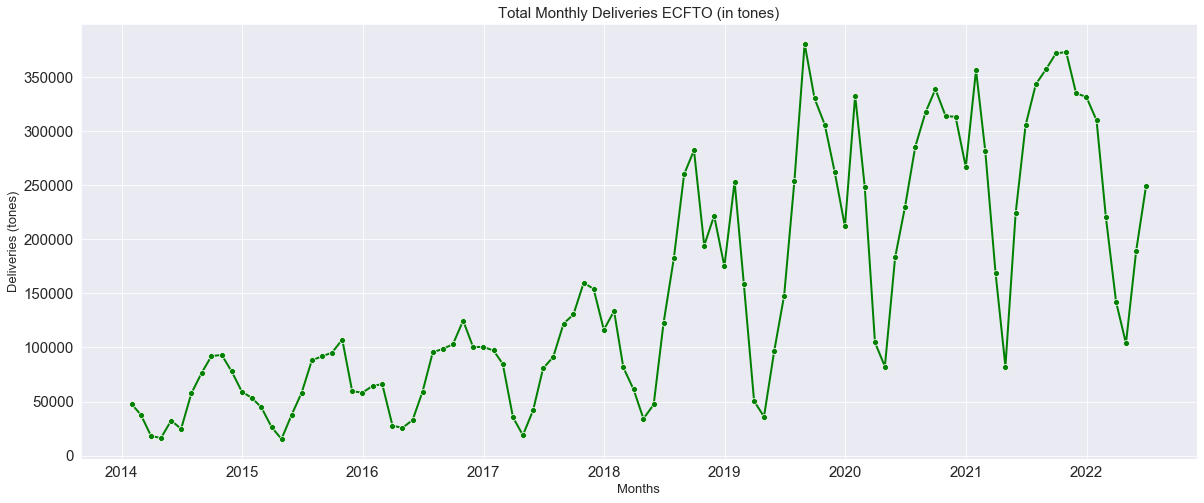

In [14]:
plt.rc("figure",figsize=(20,8))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style('darkgrid')
mDeliveries = sns.lineplot(data = dm1, x=dm1.index, y = dm1['Deliveries'], color = 'green', marker = 'o')
mDeliveries.set_title('Total Monthly Deliveries ECFTO (in tones)', fontsize = 15)
mDeliveries.set_ylabel('Deliveries (tones)', fontsize = 13)
mDeliveries.set_xlabel('Months', fontsize = 13)
plt.show()

In [15]:
#Base Histórica para treino do modelo
treino = dm1[:-5]
#Base Histórica para teste do modelo
teste = dm1[-5:]

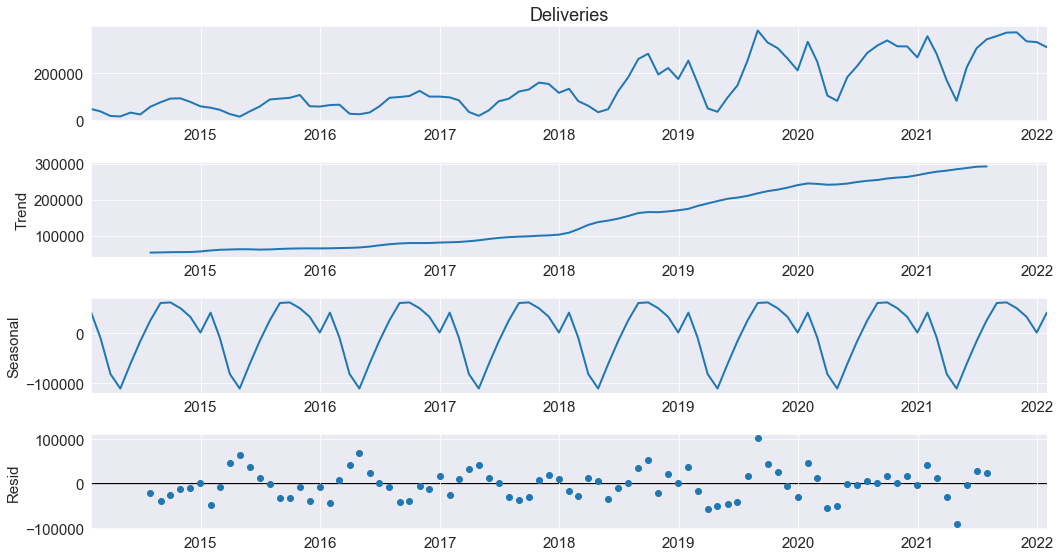

In [16]:
plt.rc("figure",figsize=(15,8))
result_deliveriesm = seasonal_decompose(treino['Deliveries'], model='additive', freq=12)
result_deliveriesm.plot()
pyplot.show()

In [17]:
auto_arima(treino['Deliveries'],seasonal=True,m=12)
stepwise_fit = auto_arima(treino['Deliveries'], start_p=0, start_q=0, max_p=6, max_q=3, m=12,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2019.005, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.535, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2006.421, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2000.702, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1998.847, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2000.753, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2001.855, Time=0.29 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1993.155, Time=0.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1994.911, Time=0.15 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1994.753, Time=0.14 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1994.860, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2004.645, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1995.012, Time=0.35 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1995.205, Time=0.11 sec
 ARIMA(0,1,2)(0,1,0

In [18]:
sARIMAXdeliveries = SARIMAX(treino['Deliveries'],order=(1,1,1),seasonal_order=(0,1,0,12))
resultado = sARIMAXdeliveries.fit()

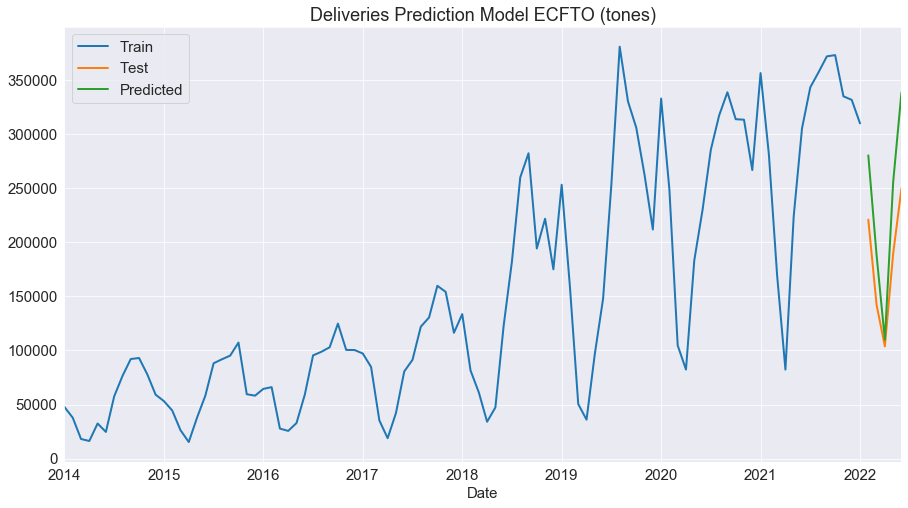

In [19]:
plt.rc("figure",figsize=(15,8))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style('darkgrid')
inicio = len(treino)
fim = len(treino)+len(teste)-1
predito = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsão sARIMA(1,1,1)(0,1,0,12')
predito.index = teste.index
treino['Deliveries'].plot(legend=True,label='Train')
teste['Deliveries'].plot(legend=True,label='Test')
predito.plot(legend=True,label='Predicted')
plt.title('Deliveries Prediction Model ECFTO (tones)')
plt.show()

In [20]:
MAPE = round(100*mean_absolute_percentage_error(teste['Deliveries'],predito),2)
print(f'sARIMA: Mean Absolute Percentage Error MAPE = {MAPE}%')

sARIMA: Mean Absolute Percentage Error MAPE = 27.08%


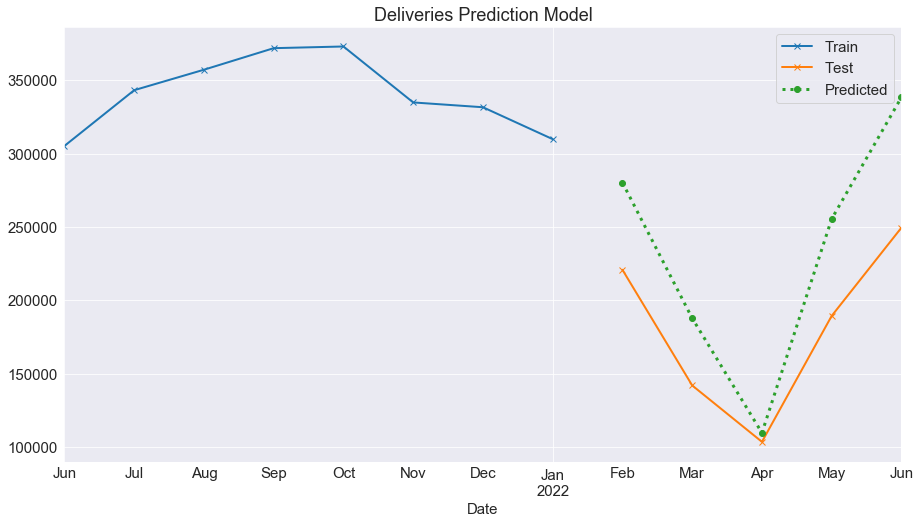

In [21]:
plt.rc("figure",figsize=(15,8))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style('darkgrid')
inicio = len(treino)
fim = len(treino)+len(teste)-1
predito = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsão sARIMA(1,1,1)(0,1,0,12')
predito.index = teste.index
treino['Deliveries'][-8:].plot(legend=True,label='Train',marker='x')
teste['Deliveries'].plot(legend=True,label='Test',marker='x')
predito.plot(legend=True,label='Predicted',linestyle='dotted',marker='o',linewidth=3)
plt.title('Deliveries Prediction Model')
plt.show()

In [22]:
result_comp = teste.copy()
result_comp['Predicted'] = 0
for i in range(result_comp.shape[0]):
  result_comp['Predicted'][i] = float(predito[i])

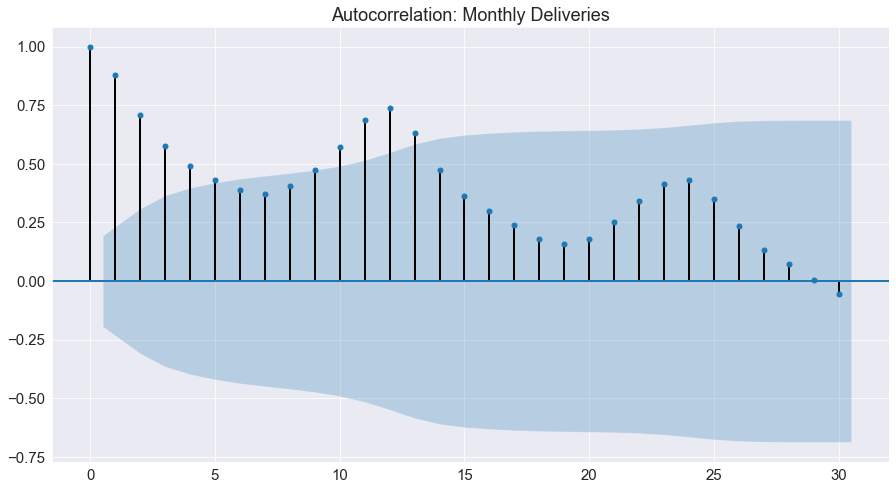

In [23]:
lags = 30
title1 = 'Autocorrelation: Monthly Deliveries'
plot_acf(dm1['Deliveries'],title=title1,lags=lags);

## Modelo de Predição

In [24]:
modelo = SARIMAX(dm1['Deliveries'], order=(1,1,1), seasonal_order=(0,1,0,12))
resultado = modelo.fit()
forecast = resultado.get_forecast(3)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha = 0.05)
yhat_conf_int['Predicted Deliveries'] = forecast.predicted_mean
yhat_conf_int['Standard Deviation'] = (yhat_conf_int['upper Deliveries']-yhat_conf_int['Predicted Deliveries'])/2
yhat_conf_int.head()

,lower Deliveries,upper Deliveries,Predicted Deliveries,Standard Deviation
2022-07-31,249137.875721,386315.676129,317726.775925,34294.450102
2022-08-31,266627.302086,423734.113491,345180.707789,39276.702851
2022-09-30,283564.752739,448264.824089,365914.788414,41175.017838


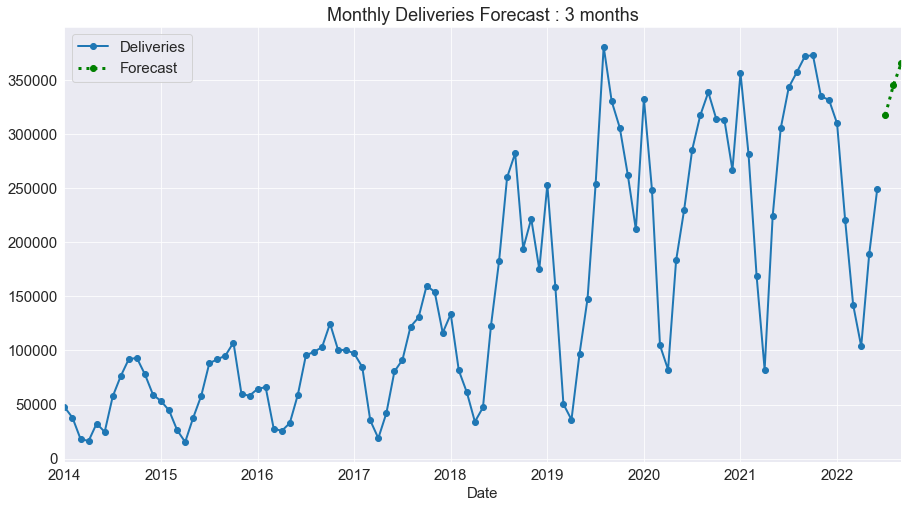

In [25]:
dm1['Deliveries'].plot(legend=True,label='Deliveries',marker='o')
forecast.predicted_mean.plot(legend=True,label='Forecast',linestyle='dotted',marker='o',linewidth=3,color='green')
plt.title('Monthly Deliveries Forecast : 3 months')
plt.show()

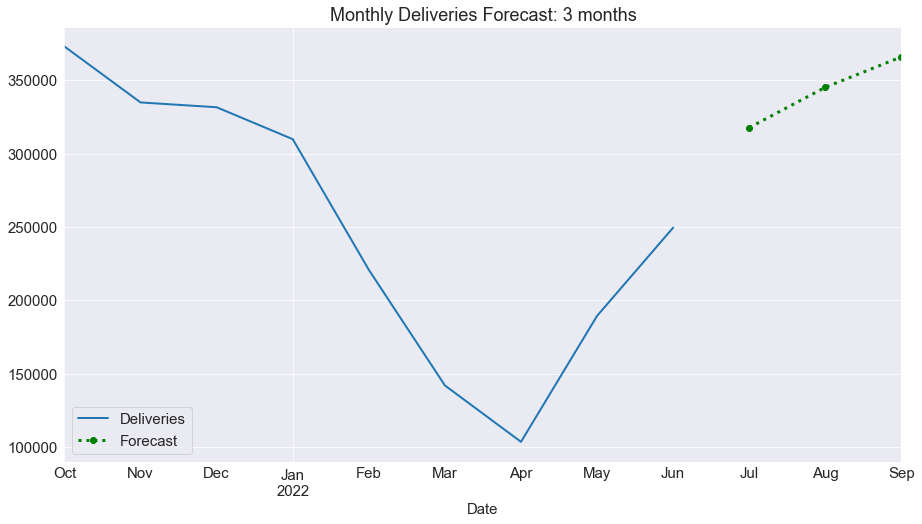

In [26]:
dm1['Deliveries'][-9:].plot(legend=True,label='Deliveries')
forecast.predicted_mean.plot(legend=True,label='Forecast',linestyle='dotted',marker='o',linewidth=3,color='green')
plt.title('Monthly Deliveries Forecast: 3 months')
plt.show()

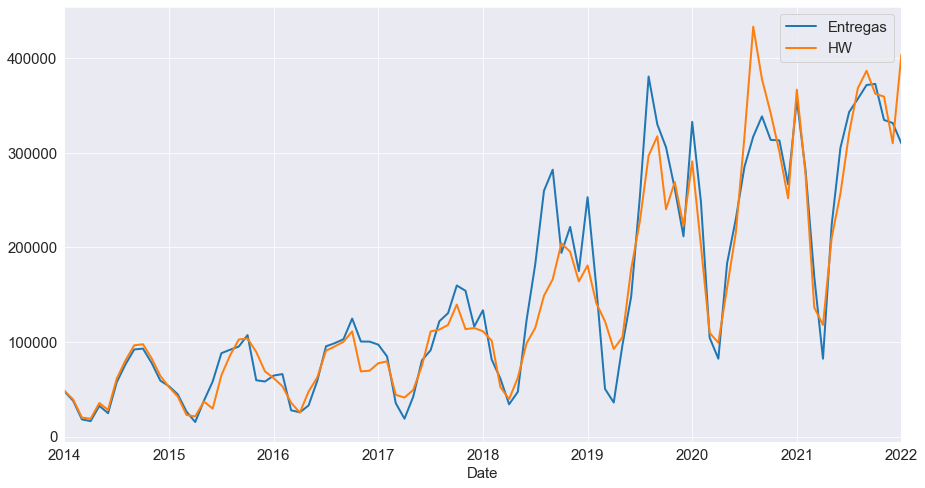

In [27]:
modelo_m1_HW = ExponentialSmoothing(treino['Deliveries'],trend='add',seasonal='add',seasonal_periods=12).fit();
treino['HoltWinters'] = modelo_m1_HW.fittedvalues
treino['Deliveries'].plot(legend=True,label='Entregas')
treino['HoltWinters'].plot(legend=True,label='HW')
plt.show()

In [28]:
predito_m1_HW = modelo_m1_HW.forecast(5).rename('Holt-Winters Forecast')

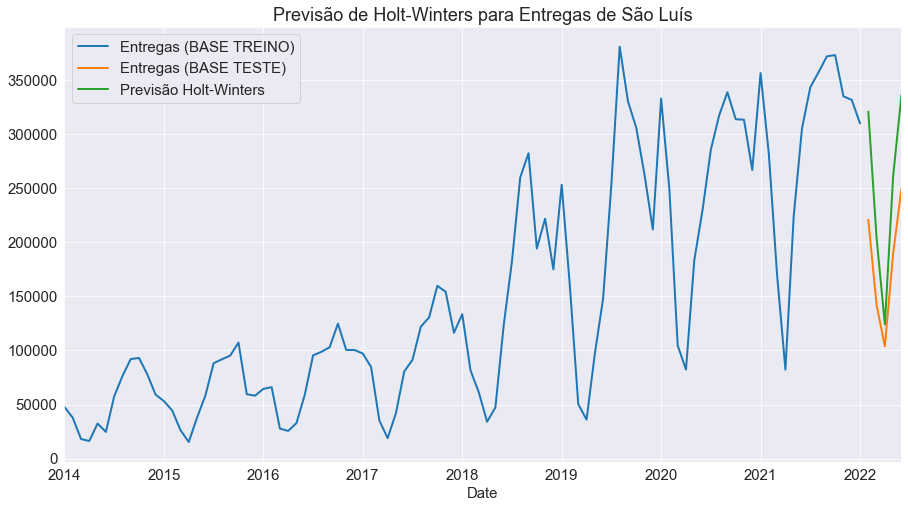

In [29]:
treino['Deliveries'].plot(legend=True,label='Entregas (BASE TREINO)')
teste['Deliveries'].plot(legend=True,label='Entregas (BASE TESTE)')
predito_m1_HW.plot(legend=True,label='Previsão Holt-Winters')
plt.title('Previsão de Holt-Winters para Entregas de São Luís')
plt.show()

In [30]:
MAPE_HW = round(100*mean_absolute_percentage_error(teste['Deliveries'],predito_m1_HW),2)
print(f'Holt-Winter: Mean Absolute Percentage Error MAPE = {MAPE_HW}%')

Holt-Winter: Mean Absolute Percentage Error MAPE = 36.12%


In [31]:
modelo_HW = ExponentialSmoothing(dm1['Deliveries'],trend='add',seasonal='add',seasonal_periods=12).fit();

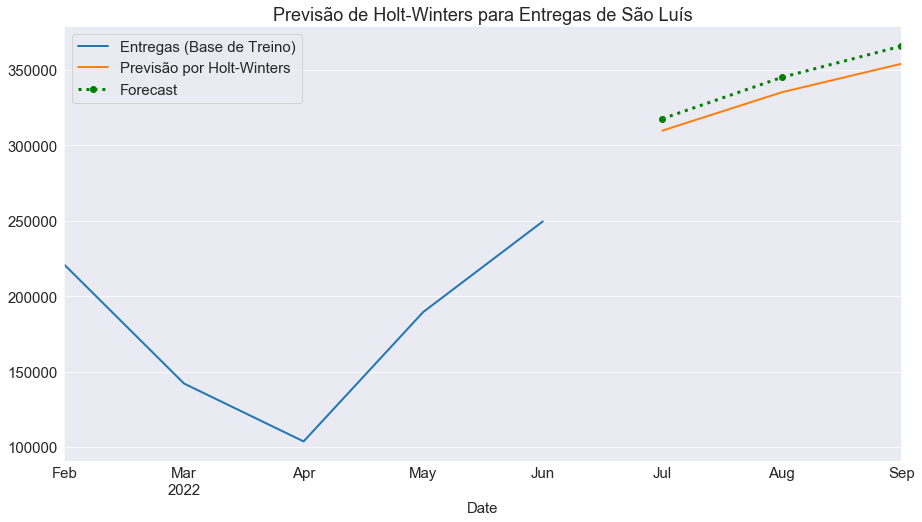

In [32]:
predito_HW = modelo_HW.forecast(3).rename('Modelo de Holt-Winters')
dm1['Deliveries'][-5:].plot(legend=True,label='Entregas (Base de Treino)')
predito_HW.plot(legend=True,label='Previsão por Holt-Winters')
forecast.predicted_mean.plot(legend=True,label='Forecast',linestyle='dotted',marker='o',linewidth=3,color='green')
plt.title('Previsão de Holt-Winters para Entregas de São Luís')
plt.show()

In [33]:
# Predição com Exponential Smoothing utilizando Holt-Winters
predito_HW

2022-07-31    309842.614280
2022-08-31    335298.485793
2022-09-30    354189.459314
Freq: M, Name: Modelo de Holt-Winters, dtype: float64

#  **_Best Model Selection - sARIMA_**

In [34]:
auto_arima(treino['Deliveries'],seasonal=True,m=12)
stepwise_fit = auto_arima(treino['Deliveries'], start_p=0, start_q=0, max_p=12, max_q=12, m=12,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2019.005, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.535, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2006.421, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2000.702, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1998.847, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2000.753, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2001.855, Time=0.23 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1993.155, Time=0.06 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1994.911, Time=0.15 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1994.753, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1994.860, Time=0.37 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2004.645, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1995.012, Time=0.25 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1995.205, Time=0.09 sec
 ARIMA(0,1,2)(0,1,0

In [35]:
modelo = SARIMAX(dm1['Deliveries'], order=(1,1,1), seasonal_order=(0,1,0,12))
resultado = modelo.fit()
forecast = resultado.get_forecast(3)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha = 0.05)
yhat_conf_int['Predicted Deliveries'] = forecast.predicted_mean
yhat_conf_int['Standard Deviation'] = (yhat_conf_int['upper Deliveries']-yhat_conf_int['Predicted Deliveries'])/2
yhat_conf_int.head()

,lower Deliveries,upper Deliveries,Predicted Deliveries,Standard Deviation
2022-07-31,249137.875721,386315.676129,317726.775925,34294.450102
2022-08-31,266627.302086,423734.113491,345180.707789,39276.702851
2022-09-30,283564.752739,448264.824089,365914.788414,41175.017838


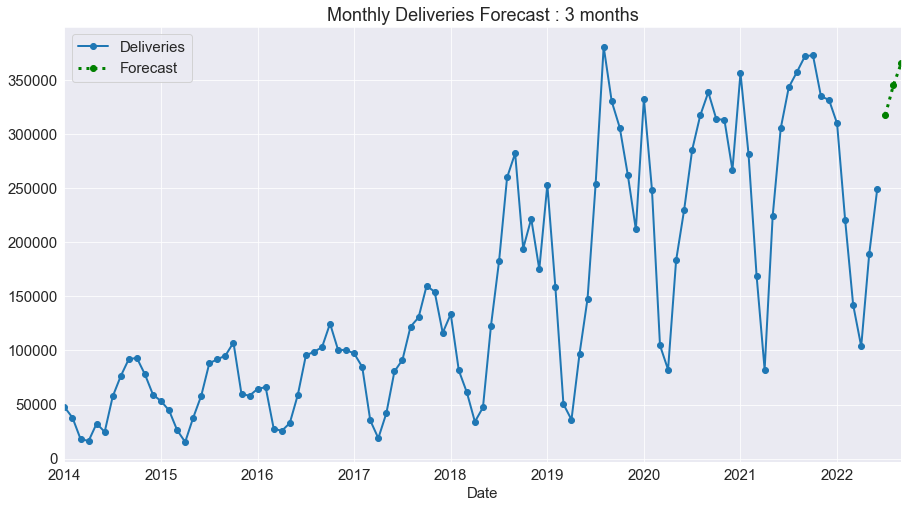

In [36]:
dm1['Deliveries'].plot(legend=True,label='Deliveries',marker='o')
forecast.predicted_mean.plot(legend=True,label='Forecast',linestyle='dotted',marker='o',linewidth=3,color='green')
plt.title('Monthly Deliveries Forecast : 3 months')
plt.show()

# _**Best Model - sARIMAX Full Year**_

In [37]:
modelo = SARIMAX(dm1['Deliveries'], order=(1,1,1), seasonal_order=(0,1,0,12))
resultado = modelo.fit()
forecast = resultado.get_forecast(6)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha = 0.05)
yhat_conf_int['Predicted Deliveries'] = forecast.predicted_mean
yhat_conf_int['Standard Deviation'] = (yhat_conf_int['upper Deliveries']-yhat_conf_int['Predicted Deliveries'])/2
yhat_conf_int.head(7)

,lower Deliveries,upper Deliveries,Predicted Deliveries,Standard Deviation
2022-07-31,249137.875721,386315.676129,317726.775925,34294.450102
2022-08-31,266627.302086,423734.113491,345180.707789,39276.702851
2022-09-30,283564.752739,448264.824089,365914.788414,41175.017838
2022-10-31,285341.653865,454205.602039,369773.627952,42215.987043
2022-11-30,246970.401571,418805.861882,332888.131726,42958.865078
2022-12-31,242990.629063,417319.021740,330154.825402,43582.098169


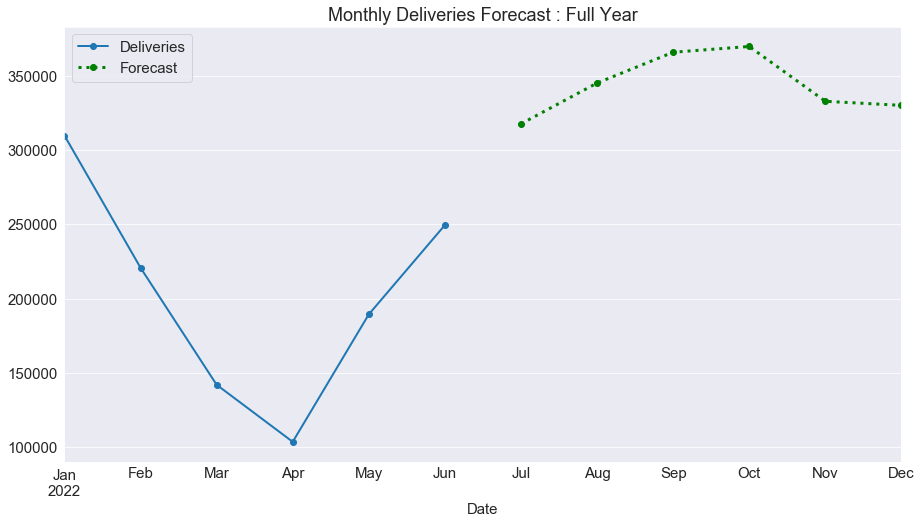

In [38]:
dm1['Deliveries'][-6:].plot(legend=True,label='Deliveries',marker='o')
forecast.predicted_mean.plot(legend=True,label='Forecast',linestyle='dotted',marker='o',linewidth=3,color='green')
plt.title('Monthly Deliveries Forecast : Full Year')
plt.show()